
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [211]:
import pandas as pd
import numpy as np

In [212]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")

In [213]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [214]:
df_bookings.shape

(134590, 12)

In [215]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [216]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [217]:
df_bookings.booking_platform.value_counts()


booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

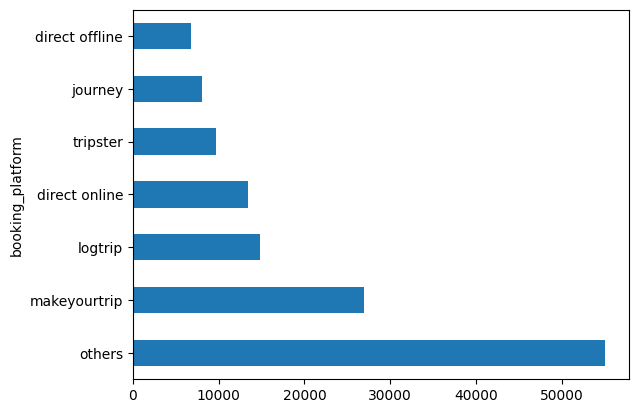

In [218]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [219]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [220]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")

In [221]:
df_hotels.shape

(25, 4)

In [222]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [223]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

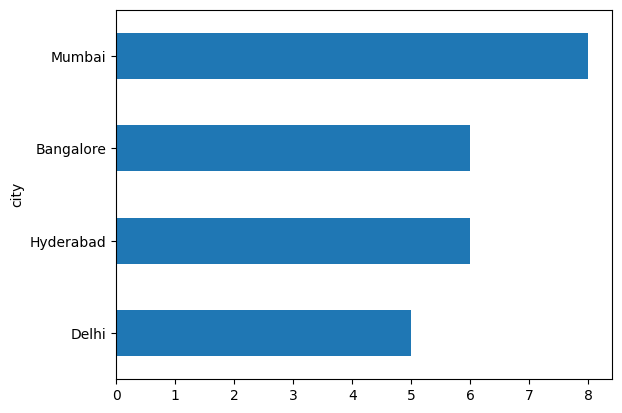

In [224]:
df_hotels.city.value_counts().sort_values().plot(kind="barh")

In [225]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [226]:
df_bookings[df_bookings.no_guests <=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [227]:
df_bookings.shape

(134590, 12)

In [228]:
# Removing the no_guests records it has negative value
df_bookings = df_bookings[df_bookings.no_guests >0]

In [229]:
df_bookings.shape

(134578, 12)

In [230]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [231]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [232]:
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [233]:
higher_limit = avg + 3 * std

In [234]:
higher_limit

np.float64(294498.50173207896)

In [235]:
lower_limt = avg - 3 * std

In [236]:
lower_limt

np.float64(-263742.4278567056)

In [237]:
df_bookings.shape

(134578, 12)

In [238]:
df_bookings = df_bookings[ df_bookings.revenue_generated < higher_limit]

In [239]:
df_bookings.shape

(134573, 12)

In [240]:
df_bookings.revenue_generated.describe()

count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [241]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [242]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [243]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [244]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [245]:
df_agg_bookings["oct_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [246]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [247]:
df_agg_bookings["oct_pct"] = df_agg_bookings["oct_pct"].apply(lambda x : round(x*100,2) )

In [248]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [249]:
df_agg_bookings.groupby("room_category")["oct_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: oct_pct, dtype: float64

In [250]:
df = pd.merge(df_agg_bookings,df_rooms, left_on="room_category", right_on="room_id")

In [251]:
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_id,room_class
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [252]:
df.groupby("room_class")["oct_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: oct_pct, dtype: float64

In [253]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [254]:
# room_id is duplicate
df.drop("room_id",axis=1,inplace=True)

In [255]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


###Print Average occupancy rate per city

In [256]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [257]:
df = pd.merge(df,df_hotels, on = "property_id")

In [258]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


<Axes: xlabel='city'>

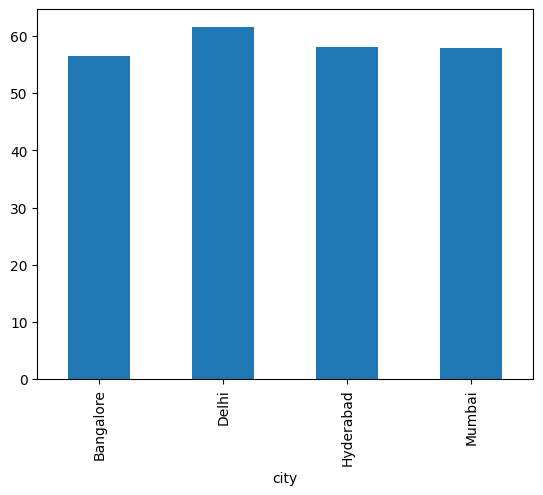

In [259]:
df.groupby("city")["oct_pct"].mean().plot(kind="bar")

In [260]:
# When was the occupancy better? weekday or weekend?

In [261]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [262]:
df = pd.merge(df, df_date, left_on="check_in_date",right_on="date")

In [263]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [264]:
df.groupby("day_type")["oct_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: oct_pct, dtype: float64

In [265]:
# In the month of June, what is the occupancy for different citites

In [266]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [267]:
df_june_22 = df[df['mmm yy'] == 'Jun 22']
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [268]:
df_june_22.groupby("city")["oct_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: oct_pct, dtype: float64

In [269]:
df_aug = pd.read_csv("datasets/new_data_august.csv")

In [270]:
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [271]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'oct_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [272]:
df.shape

(6500, 14)

In [273]:
# axis = 0 means row level concatination

latest_df = pd.concat([df,df_aug],ignore_index=True,axis=0)
latest_df.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [274]:
latest_df.shape

(6507, 15)

In [275]:
#Print revenue realized per city

In [276]:
df_booking_all = pd.merge(df_bookings,df_hotels, on ="property_id")

In [277]:
df_booking_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [278]:
df_booking_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [279]:
df_booking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [283]:
df_date["date"] = pd.to_datetime(df_date["date"])

In [284]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [286]:
df_booking_all["check_in_date"] = pd.to_datetime(
    df_booking_all["check_in_date"], format="mixed", dayfirst=True, errors="coerce"
)


In [287]:
df_booking_all.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
property_name            0
category                 0
city                     0
dtype: int64

In [288]:
df_booking_all_date = pd.merge(df_booking_all,df_date, left_on="check_in_date", right_on="date")

In [289]:
df_booking_all_date.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [290]:
df_booking_all_date.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64